In [ ]:
# k value should not be = class factor
- k should not be  = 1
- k > num of classes
- k not equal to num of classes
- k> classes
# KNN Regration
- k = 1 or 3 note:- it consider outliers

In [1]:
# Commonly used libraries
from glob import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns # Datea visualization
import re # text processing 
from sklearn.preprocessing import MinMaxScaler, StandardScaler # normalization
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # convert text data into numbers
from sklearn.decomposition import PCA # Dimensional Reduction
from sklearn.model_selection import train_test_split # cross validation 
from sklearn.model_selection import KFold # cross validation n parts
import cv2 # image processing
from pandas_ml import ConfusionMatrix # model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix # model evaluation metrics
from sklearn.metrics import auc, roc_curve # model evaluation
# deployment
import pickle
from sklearn.externals import joblib
%matplotlib inline

### Data Understanding
- Read Data
- Data Visualisation
- Descriptive Statistics
- Data Preprocessing
    - Data Cleaning
    - Imputing Missing Values
    - Normalization/Transformation
- Feature Engineering

In [2]:
# Reading data
data = pd.read_csv('./iris.data')
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
data['Iris-setosa'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Iris-setosa, dtype: int64

In [4]:
# Count missing values
data.isnull().sum().sum()

0

In [9]:
# Split into independent and dependent
# .values -> convert dataframe into arrays
X = data.iloc[:,:-1].values # independent variables
y = data.iloc[:,-1].values # dependent variables or target variables or labels or annotations
le = LabelEncoder()
y_le = le.fit_transform(y)

In [10]:
print('INFO: shape of X =',X.shape)
print('INFO: shape of y =',y.shape)

INFO: shape of X = (149, 4)
INFO: shape of y = (149,)


### Descriptive Statistics (Data Analysis & Visualisation)

### Data Preprocessing
- Normalization
    - MinMax Scaling

In [11]:
mmx = MinMaxScaler() # 0 -1 range
Xnorm = mmx.fit_transform(X) # normalise all values into 0 - 1 range
print('INFO: Xnorm =',Xnorm.shape)

INFO: Xnorm = (149, 4)


In [12]:
print('INFO: Xnorm maximum =',Xnorm.max())
print('INFO: Xnorm minimum =',Xnorm.min())

INFO: Xnorm maximum = 1.0
INFO: Xnorm minimum = 0.0


### Feature Engineering
- Backward Elimation 
- Forward Selection
- Dimension Reduction Technique (PCA)

In [13]:
pca = PCA() # initialize pca with all components
x_pca = pca.fit_transform(Xnorm) # Transform the matrix 
print('INFO: x_pca =',x_pca.shape)
print('INFO: Number of compoenets =',pca.n_components_)

INFO: x_pca = (149, 4)
INFO: Number of compoenets = 4


In [14]:
exvar = pca.explained_variance_ratio_ # explained variance for each pc (principal component)
cumvar = np.cumsum(exvar) # cumulative variance (R^2)

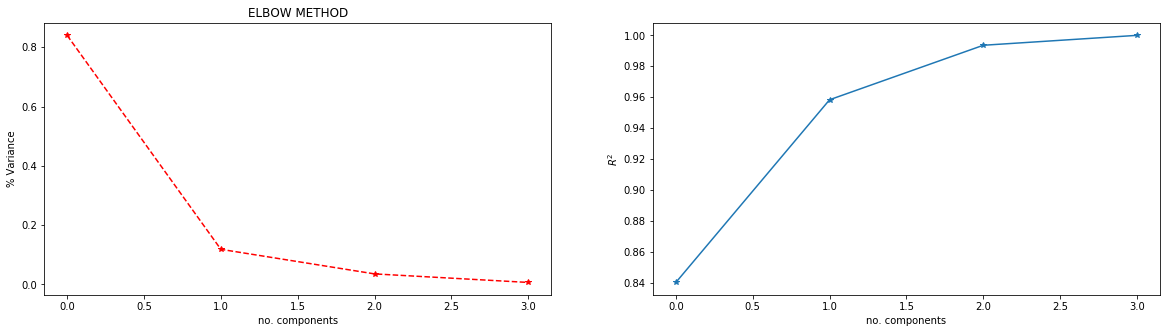

In [15]:
plt.figure(figsize=(20,5)) # 20x 5
plt.subplot(1,2,1) # plotting explained variance
plt.title('ELBOW METHOD')
plt.plot(exvar,'r*--'), plt.xlabel('no. components'), plt.ylabel('% Variance')
plt.subplot(1,2,2) # plotting R^2
plt.plot(cumvar,'*-'), plt.xlabel('no. components'), plt.ylabel('$R^2$')
plt.show()

From above plot and using **Elbow** method optimal number of components is around the variance of 
80% - 95%

In [17]:
pca = PCA(0.90) # initialize pca with all components
x_pca = pca.fit_transform(Xnorm) # Transform the matrix 
print('INFO: x_pca =',x_pca.shape)
print('INFO: Number of components =',pca.n_components_)

INFO: x_pca = (149, 2)
INFO: Number of components = 2


### Splitting Data 
- Traning
- Testing

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_pca,y_le,test_size = 0.2)
print('INFO: shape of x_train =',x_train.shape)
print('INFO: shape of x_test =',x_test.shape)
print('INFO: shape of y_train =',y_train.shape)
print('INFO: shape of y_test =',y_test.shape)

INFO: shape of x_train = (119, 2)
INFO: shape of x_test = (30, 2)
INFO: shape of y_train = (119,)
INFO: shape of y_test = (30,)


## Machine Learning Model
- Logistics Regresion

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
model = LogisticRegression()
model_knn = KNeighborsClassifier(n_neighbors=11)

In [36]:
model.fit(x_train,y_train) # model training
model_knn.fit(x_train,y_train)
print('INFO: model train sucessfully')

INFO: model train sucessfully


/home/praveen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/praveen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Model Evalution

In [37]:
y_pred_test = model_knn.predict(x_test)
y_pred_train = model_knn.predict(x_train)


In [38]:
cm_train = ConfusionMatrix(y_train,y_pred_train)
cr_train = classification_report(y_train,y_pred_train)

In [39]:
cm_test = ConfusionMatrix(y_test,y_pred_test)
cr_test = classification_report(y_test,y_pred_test)

In [40]:
print(cm_train)

Predicted   0   1   2  __all__
Actual                        
0          41   0   0       41
1           0  37   2       39
2           0   3  36       39
__all__    41  40  38      119


In [41]:
print(cr_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.93      0.95      0.94        39
           2       0.95      0.92      0.94        39

   micro avg       0.96      0.96      0.96       119
   macro avg       0.96      0.96      0.96       119
weighted avg       0.96      0.96      0.96       119

